In [2]:
# !pip install streamlit pandas
# !pip install matplotlib

In [3]:
%matplotlib inline

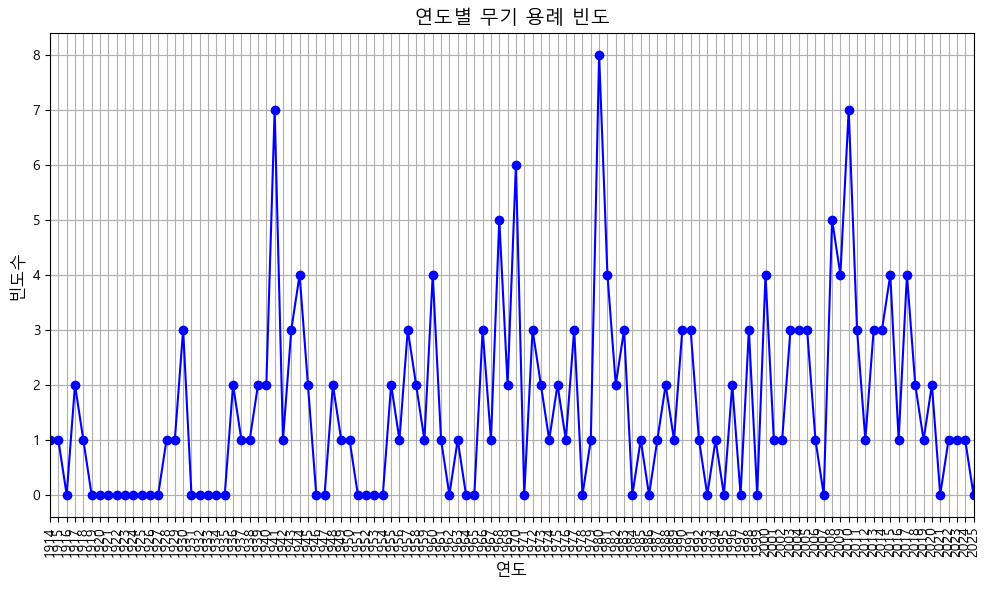

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re

# 한글 폰트 설정
matplotlib.rc('font', family='Malgun Gothic')  # Windows에서 사용하는 한글 폰트
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 처리

# CSV 파일에서 데이터 읽기
# 예시로 'data.csv'라는 CSV 파일을 사용한다고 가정합니다.
df = pd.read_csv('통합.csv')

# '용례리스트' 컬럼에서 용례들을 가져옵니다.
example_usage = df['용례리스트'].dropna().tolist()  # NaN 값은 제외하고 리스트로 변환

# 1. 용례에서 '0000년' 추출하여 연도 파악
years = []

for usage in example_usage:
    # 연도 추출 (4자리 숫자 + '년')
    year_match = re.findall(r'\d{4}년', usage)
    if year_match:
        # '년'을 제거하고 연도만 저장
        years.append(year_match[0].replace('년', ''))

# 연도 빈도 계산
year_counts = pd.Series(years).value_counts().sort_index()

# 2. x축 범위를 1914년부터 2025년까지 설정하기 위해, 해당 연도 범위 생성
all_years = [str(year) for year in range(1914, 2026)]  # 1914년부터 2025년까지 연도 리스트
all_years_series = pd.Series(0, index=all_years)  # 모든 연도의 빈도수를 0으로 초기화

# 실제 데이터를 all_years_series에 병합
year_counts = all_years_series.add(year_counts, fill_value=0)

# 3. 시계열 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='b')

# 그래프 설정
plt.title('연도별 무기 용례 빈도', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.grid(True)

# x축 레이블 45도 회전
plt.xticks(rotation=90)

# x축 범위 설정
plt.xlim('1914', '2025')

# 출력
plt.tight_layout()
plt.show()


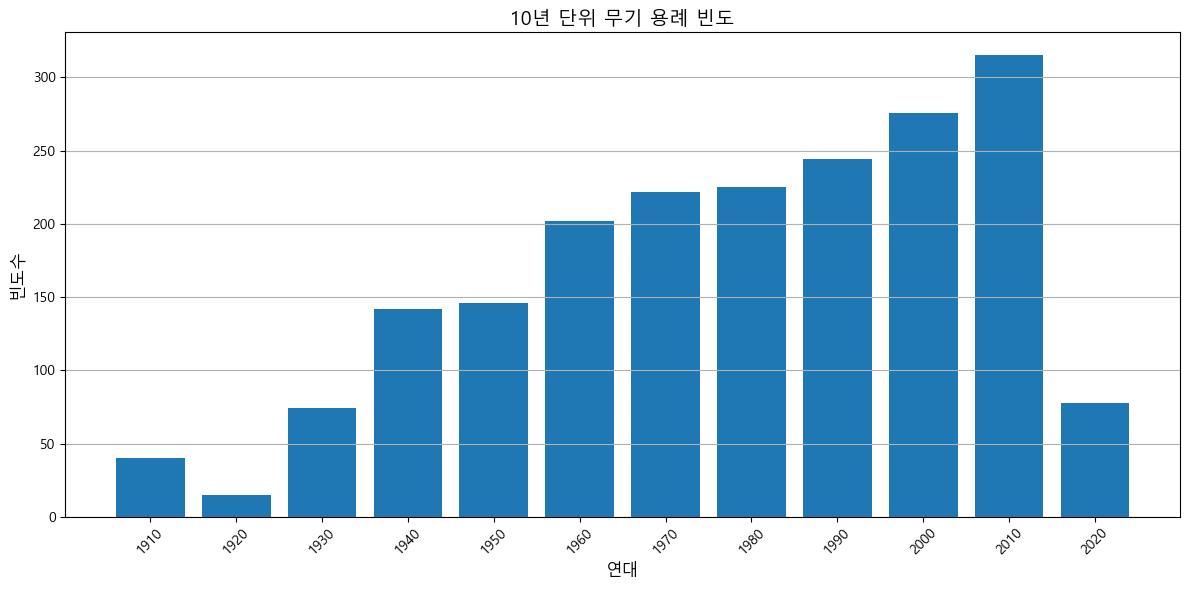

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import re

# 한글 폰트 설정
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# CSV 파일 로드
df = pd.read_csv('통합.csv')
example_usage = df['용례리스트'].dropna().tolist()

# 연도 추출
years = []
for usage in example_usage:
    matches = re.findall(r'\d{4}년', usage)
    for match in matches:
        year = int(match.replace('년', ''))
        if 1914 <= year <= 2025:  # 유효 범위 내에서만 추가
            years.append(year)

# 연도를 10년 단위로 변환 (예: 1917 → 1910, 1984 → 1980)
decades = [str((year // 10) * 10) for year in years]

# 10년 단위 빈도수 집계
decade_counts = pd.Series(decades).value_counts().sort_index()

# 누락된 10년대 채우기
all_decades = [str(year) for year in range(1910, 2030, 10)]
decade_counts = pd.Series(0, index=all_decades).add(decade_counts, fill_value=0)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(decade_counts.index, decade_counts.values)

plt.title('10년 단위 무기 용례 빈도', fontsize=14)
plt.xlabel('연대', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
